<a href="https://colab.research.google.com/github/gomlfx/apiaryfund/blob/master/nnsspp_LSTM_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

In [ ]:
df = pd.read_csv('EURUSD60.csv')
df.columns=["date","time","open","high","low","close","volume"]
df['datetime'] = df['date'] + " " + df['time']
df.tail()

FileNotFoundError: ignored

In [ ]:
#preprocessing
df = df['close'].values
df = df.reshape(-1,1)
print(df.shape)
df[:7]

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

In [ ]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

In [ ]:
def create_my_dataset(df):
  x = []
  y = []
  for i in range(50,df.shape[0]):
    x.append(df[i-50:i,0])
    y.append(df[i,0])
  x = np.array(x)
  y = np.array(y)
  return x,y

In [ ]:
x_train, y_train = create_my_dataset(dataset_train)
x_train[:1]

In [ ]:
y_train[:1]

In [ ]:
x_test, y_test = create_my_dataset(dataset_test)
x_test[:1]

In [ ]:
#reshaping for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)

In [ ]:
#tf.logging.set_verbosity(tf.logging.ERROR)
model = Sequential()
model.add(LSTM(units = 96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
if(not os.path.exists(r'C:\Users\admin\Desktop\EURUSD60.h5')):
  model.fit(x_train, y_train, epochs=50, batch_size=32)
  model.save(r'C:\Users\admin\Desktop\EURUSD60.h5')

In [ ]:
model = load_model(r'C:\Users\admin\Desktop\EURUSD60.h5')

In [ ]:
%matplotlib inline 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red', label='original price')
ax.plot(range(len(y_train)+50, len(y_train)+50+len(predictions)), predictions, color='blue', label='predicted')
plt.legend()
print(range(len(y_train)+50, len(y_train)+50+len(predictions)))

In [ ]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label = 'True Price of testing set')
plt.plot(predictions, color = 'blue', label='predicted')
plt.legend()

In [41]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [43]:
df = pd.read_csv('EURUSD_H1_197101040000_202008052300.csv', sep='\t')
df.head()
# df.columns=["date","time","open","high","low","close","volume"]
# df['datetime'] = df['date'] + " " + df['time']
# df = pd.DataFrame(df)
# df.tail()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,1971.01.04,00:00:00,0.5369,0.5369,0.5369,0.5369,1,0,50
1,1971.01.05,00:00:00,0.5366,0.5366,0.5366,0.5366,1,0,50
2,1971.01.06,00:00:00,0.5365,0.5365,0.5365,0.5365,1,0,50
3,1971.01.07,00:00:00,0.5368,0.5368,0.5368,0.5368,1,0,50
4,1971.01.08,00:00:00,0.5371,0.5371,0.5371,0.5371,1,0,50


In [44]:
df['<DATETIME>'] = df['<DATE>'] + " " + df['<TIME>']
df = pd.DataFrame(df)
df.tail()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,<DATETIME>
141150,2020.08.05,19:00:00,1.18968,1.18982,1.18670,1.18732,2770,0,1,2020.08.05 19:00:00
141151,2020.08.05,20:00:00,1.18732,1.18787,1.18625,1.18655,1537,0,1,2020.08.05 20:00:00
141152,2020.08.05,21:00:00,1.18654,1.18678,1.18545,1.18599,1389,0,1,2020.08.05 21:00:00
141153,2020.08.05,22:00:00,1.18599,1.18660,1.18581,1.18590,1594,0,1,2020.08.05 22:00:00
141154,2020.08.05,23:00:00,1.18590,1.18593,1.18555,1.18581,213,0,2,2020.08.05 23:00:00


In [45]:
df = df.set_index('<DATETIME>')[['<CLOSE>']].tail(24000)
df = df.set_index(pd.to_datetime(df.index))
df.head()

,<CLOSE>
<DATETIME>,
2016-09-23 13:00:00,1.12233
2016-09-23 14:00:00,1.12148
2016-09-23 15:00:00,1.12172
2016-09-23 16:00:00,1.12170
2016-09-23 17:00:00,1.12182


In [46]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index = df.index)
df.head()


,<CLOSE>
<DATETIME>,
2016-09-23 13:00:00,0.395596
2016-09-23 14:00:00,0.391721
2016-09-23 15:00:00,0.392815
2016-09-23 16:00:00,0.392724
2016-09-23 17:00:00,0.393271


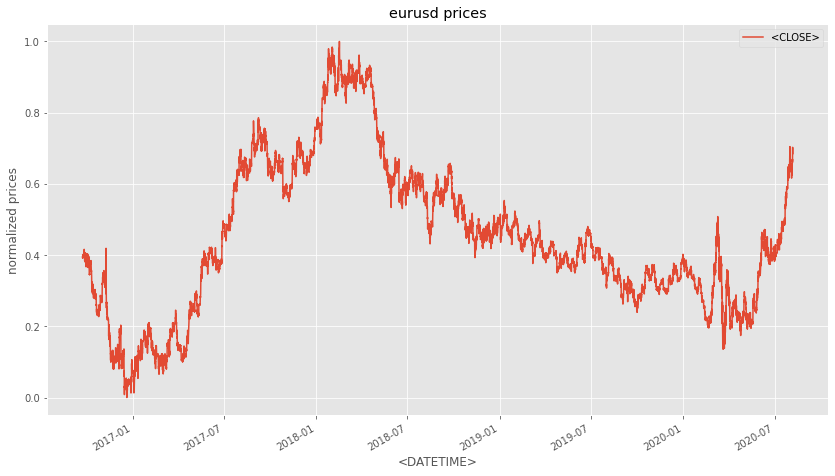

In [47]:
df.plot(figsize=(14,8))
plt.title('eurusd prices')
plt.ylabel('normalized prices')
plt.show()

In [48]:
def split_sequences(seq, n_steps_in, n_steps_out):
  X,y =[], []

  for i in range(len(seq)):
    end = i+n_steps_in
    out_end = end + n_steps_out

    if out_end > len(seq):
      break

    seq_x, seq_y = seq[i:end], seq[end:out_end]

    X.append(seq_x)
    y.append(seq_y)

  return np.array(X), np.array(y)

In [49]:
def visualize_results(results):
  history = results.history
  plt.figure(figsize=(12,4))
  plt.plot(history['val_loss'])
  plt.plot(history['loss'])
  plt.legend(['val_loss','loss'])
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.show()

  plt.figure(figsize=(12,4))
  plt.plot(history['val_accuracy'])
  plt.plot(history['accuracy'])
  plt.legend(['val_accuracy','accuracy'])
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.show()

In [50]:
n_per_in = 20000
n_per_out = 24

n_features = 1

X,y = split_sequences(list(df['<CLOSE>']), n_per_in, n_per_out)

print(X.shape)

X = X.reshape(X.shape[0],X.shape[1],n_features)

print(X.shape)

(3977, 20000)
(3977, 20000, 1)


In [51]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(n_per_in,n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(n_per_out))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 20000, 100)        40800     
_________________________________________________________________
dropout_6 (Dropout)          (None, 20000, 100)        0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 20000, 100)        80400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 20000, 100)        0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)               

In [52]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
res = model.fit(X,y, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
 48/112 [===========>..................] - ETA: 2:02:28 - loss: 0.0154 - accuracy: 0.0495

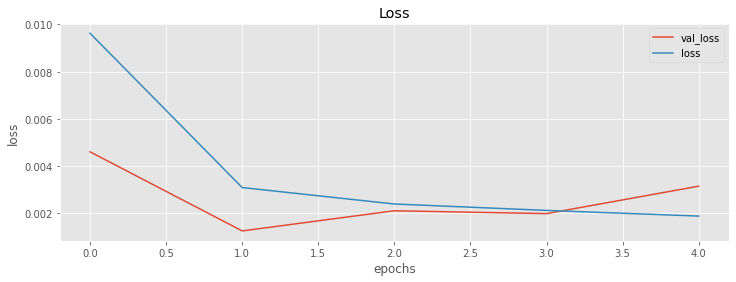

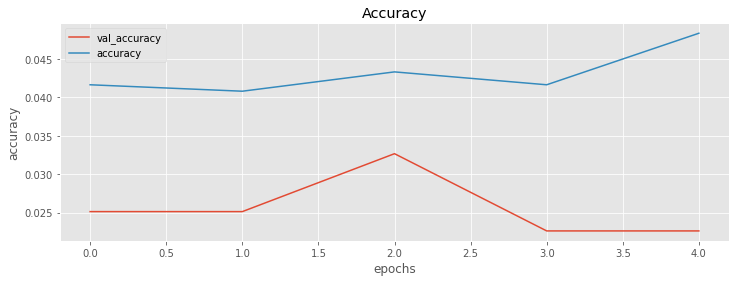

In [ ]:
visualize_results(res)

predicted  [[1.16873287027359], [1.1672121300065517], [1.1691203569424151], [1.1667271976578235], [1.169033090956211], [1.167362505276799], [1.1672017897498608], [1.1666467555987834], [1.168234265986085], [1.168179819075465], [1.1671259478205442], [1.1665988917708396], [1.1665647079098225], [1.167935827552676], [1.1668290588200092], [1.1670841211611032], [1.1675480117297172], [1.1661027681815623], [1.1677000969958304], [1.1668819562977553], [1.1651261518102884], [1.1667201328861714], [1.1662154191768168], [1.1661713205510378]]
actuals  [[1.17519], [1.1758899999999999], [1.1764], [1.17617], [1.176], [1.17602], [1.17601], [1.1753499999999997], [1.17582], [1.17721], [1.17675], [1.1773799999999999], [1.17666], [1.17766], [1.17864], [1.17924], [1.17945], [1.1770100000000001], [1.1761], [1.1728100000000001], [1.1724199999999998], [1.17565], [1.17652], [1.1777600000000004]]


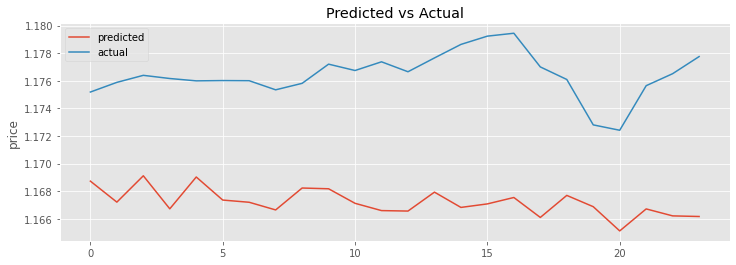

In [ ]:
plt.figure(figsize=(12,4))

yhat = model.predict(X[-1].reshape(1,n_per_in,n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

actual = scaler.inverse_transform(y[-1].reshape(-1,1))

print("predicted ", yhat)
plt.plot(yhat, label="predicted")

print("actuals ", actual.tolist())
plt.plot(actual.tolist(), label="actual")

plt.title("Predicted vs Actual")
plt.ylabel('price')
plt.legend()
plt.show()

                      <CLOSE>
2020-08-04 19:00:00  1.172030
2020-08-04 20:00:00  1.170256
2020-08-04 21:00:00  1.172312
2020-08-04 22:00:00  1.169760
2020-08-04 23:00:00  1.172072
2020-08-05 00:00:00  1.170355
2020-08-05 01:00:00  1.170168
2020-08-05 02:00:00  1.169629
2020-08-05 03:00:00  1.171380
2020-08-05 04:00:00  1.171308
2020-08-05 05:00:00  1.170205
2020-08-05 06:00:00  1.169814
2020-08-05 07:00:00  1.169516
2020-08-05 08:00:00  1.171050
2020-08-05 09:00:00  1.169864
2020-08-05 10:00:00  1.170189
2020-08-05 11:00:00  1.170734
2020-08-05 12:00:00  1.169253
2020-08-05 13:00:00  1.170846
2020-08-05 14:00:00  1.169989
2020-08-05 15:00:00  1.168230
2020-08-05 16:00:00  1.169867
2020-08-05 17:00:00  1.169280
2020-08-05 18:00:00  1.169295


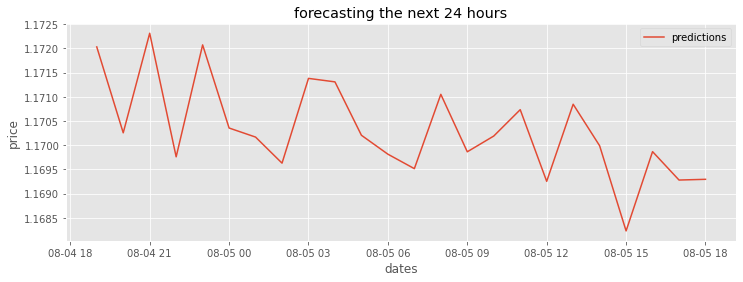

In [ ]:
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1,n_per_in,n_features)).tolist()[0]
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat),freq='H'), columns=df.columns)

print(preds)

periods = 10

actual = pd.DataFrame(scaler.inverse_transform(df[['<CLOSE>']].tail(periods)), index = df['<CLOSE>'].tail(periods).index, columns = df.columns).append(preds.head(1))

plt.figure(figsize=(12,4))
#plt.plot(actual, label='actuals')
plt.plot(preds, label='predictions')
plt.ylabel('price')
plt.xlabel('dates')
plt.title(f'forecasting the next {len(yhat)} hours')
plt.legend()
plt.show()
